# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Tawain (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source of dataset 
UCI Machine Learning Repository [click here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 


[Download dataset](https://drive.google.com/file/d/1uUOmUjoOgrJAooZUUzr4kR6zqiV0cmHw/view?usp=sharing()

# 1. Import Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#import package
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
# cek jumlah row dan column
df.shape

(414, 8)

Dataset real estate valuation mempunya 414 baris dan 7 kolom diluar kolom no

In [ ]:
#drop column no
df.drop(columns='No', inplace=True)

In [ ]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Profiling Descriptive Stats

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


#### Simplify the colums label for a better processing

In [ ]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
#Hapus comment pada label column supaya lebih simple
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

In [ ]:
df

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# 2. EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**2.1. Gambarkan keadaan dari harga rumah pada variable (house price of unit area)!**

**a. Gambaran dapat dijelaskan melalui statistik deskriptif dari variable harga rumah tersebut.**

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Key takeaway: Harga rumah menyebar dari range 7.6 Ping sampai 117.5 Ping dengan rata-rata harga rumah 37.9 Ping. Data sebaran harga rumah hampir menyebar normal jika dilihat dari nilai mean dan mediannya yang hampir sama.

**b. Bagaimana sebaran harga rumah tersebut?**

Hint: Dapat dicek menggunakan statistical plot, kemudian apa key take away yang bisa
diambil? Coba uraikan!

In [ ]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

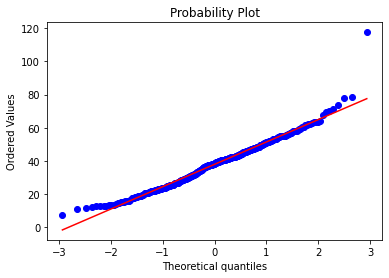

In [ ]:
#QQ-Plot
stats.probplot(df['Y'], dist='norm', plot=py)
py.show()

Key takeaway: Berdasarkan QQ-plot dapat diketahui bahwa titik-titik data menempel atau mendekati garis diagonalnya. Hal ini menunjukkan bahwa data harga unit rumah menyebar normal/berdistribusi normal/normalitas. Maka model harga unit rumah bisa diprediksi menggunakan model regresi karena memenuhi salah satu asumsi regresi yaitu asumsi normalitas.

**c. Apakah ada nilai outlier pada variabel harga rumah? Jika ada, nilai berapa saja?**


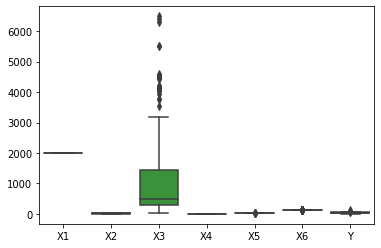

In [ ]:
sns.boxplot(data=df)

Key takeaway: Ada outliers pada fitur x3, x5, x6, dan Y

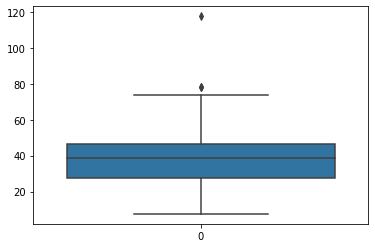

In [ ]:
sns.boxplot(data=df['Y'])

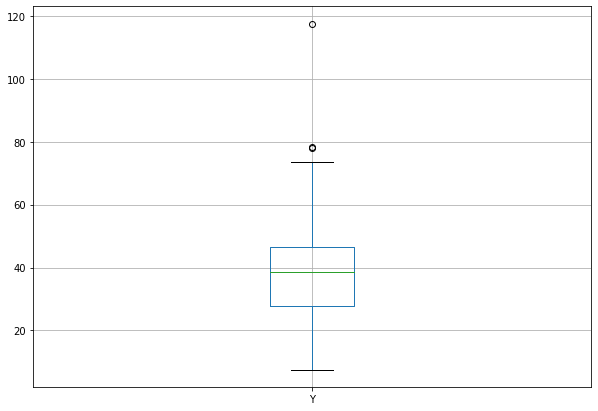

In [ ]:
df[['Y']].boxplot(figsize=(10,7))

Key takeaway: Ada outliers pada variable target Y yaitu data disekitar nilai 75-80 dan data di bawah 120

In [ ]:
#Find Q1 & Q3
# q1 = np.quantile(df['Y'], 0.25) #np.precentile(df['Y'], 25)
# q2 = np.quantile(df['Y'], 0.50)
# q3 = df['Y'].quantile(0.75)

q1, q2, q3 = np.quantile(df['Y'], [0.25, 0.50, 0.75])

print(f'q1: {q1}\nq2: {q2}\nq3: {q3}')

q1: 27.7
q2: 38.45
q3: 46.6


In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr = q3 - q1
iqr

18.900000000000002

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr)
upper_bond = q3 + (1.5*iqr)

print(f'lower: {lower_bond}, upper: {upper_bond}')

lower: -0.6500000000000021, upper: 74.95


In [ ]:
# Find outliers
df[(df['Y'] < lower_bond) | (df['Y'] > upper_bond)]

,X1,X2,X3,X4,X5,X6,Y
220,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


Key takeaway: Nilai outliernya adalah nilai yang lebih dari upper bond (78, 78.3, dan 117.5)

**d. Variabel apa saja yang berkorelasi dengan harga rumah? Bagaimana arah dan seberapa
erat hubungannya?**

**Note : Jika koef korelasi >= 0.5, ada hubungan antar variabel**

**Jika koef korelasi < 0.5, tidak ada hubungan antar variabel**

In [ ]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<ipython-input-443-7620f98261ec>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

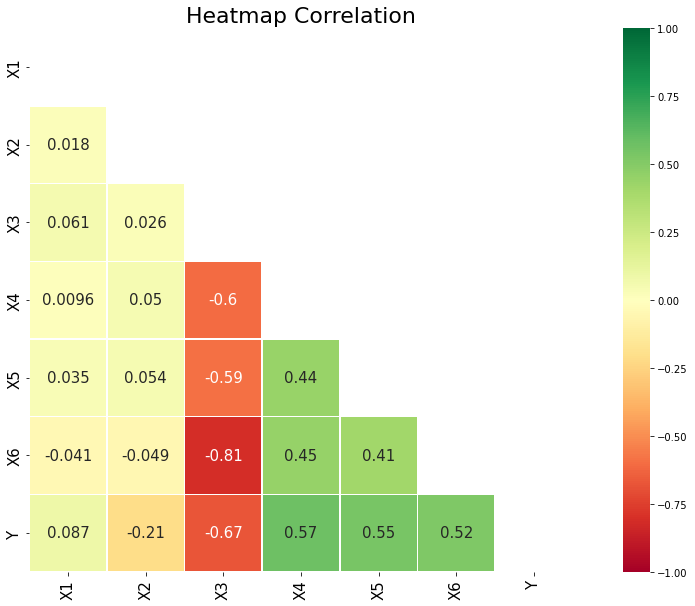

In [ ]:
#Heatmap Correlation
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway: Berdasarkan correlation test sebelum drop outliers dapat diketahui bahwa ada hubungan variable antara variable X3, X4, X5, dan X6 dengan Y.

X3 dan Y memiliki koef corr negatif(-0.67), artinya jarak MRT berhubungan negatif dengan besarnya harga unit rumah area perumahan dengan MRT semakin mahal harga rumahnya, dan sebaliknya. Semakin dekat stasiun MRT semakin mahal harga unit rumahnya.

### X2 vs Y

In [ ]:
import matplotlib.pyplot as plt

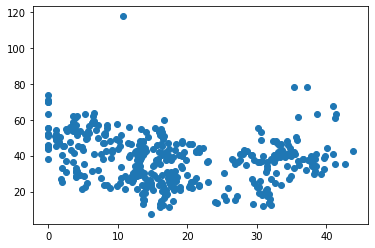

In [ ]:
#House Age vs House Price Plot
plt.scatter(df['X2'],df['Y'])

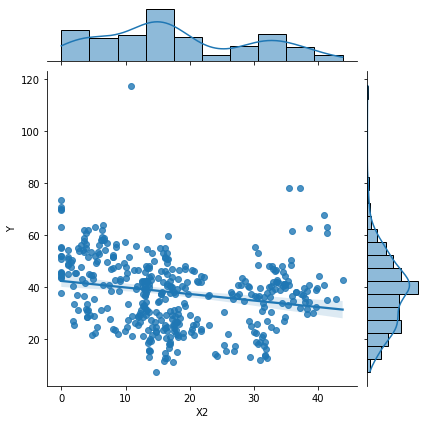

In [ ]:
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X2', y='Y', data=df, kind="reg")

Key takeaway: Tidak ada hubungan signifikan antara umur unit rumah dengan harga unit rumah.

### X3 vs Y

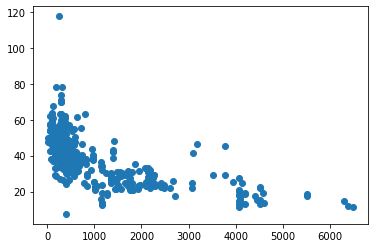

In [ ]:
#distance to the nearest MRT station vs House Price Plot
plt.scatter(df['X3'],df['Y'])

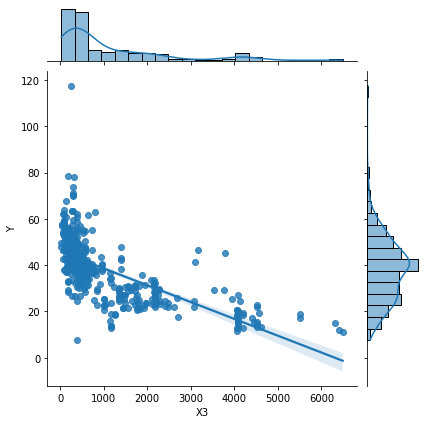

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X3', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan negatif antara jarak MRT di sekitar area perumahan dengan harga unit rumah. Semakin dekat jarak MRT, maka semakin mahal harga unit rumah.

### X4 vs Y

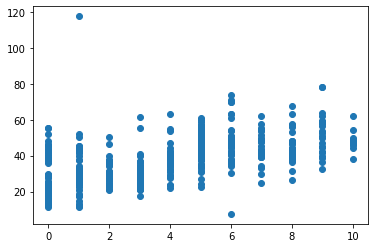

In [ ]:
#number of convenience stores vs House Price
plt.scatter(df['X4'],df['Y'])

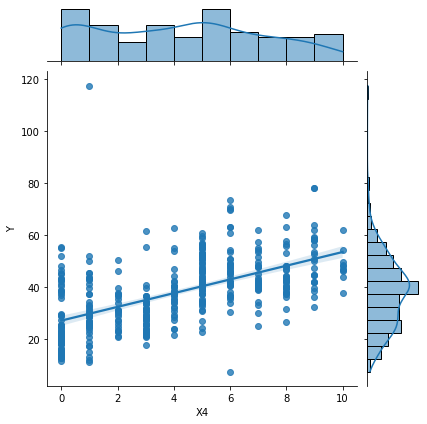

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X4', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan positif antara banyaknya pusat perbelanjaan/minimarket di sekitar area perumahan dengan harga unit rumah. Semakin banyak pusat perbelanjaan/minimarket, maka semakin mahal harga unit rumahnya.

### X5 vs Y

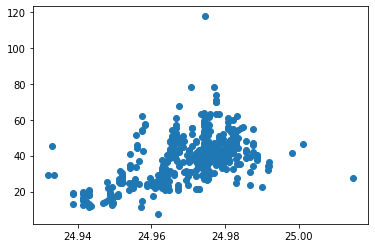

In [ ]:
#Latitude vs House Price
plt.scatter(df['X5'],df['Y'])

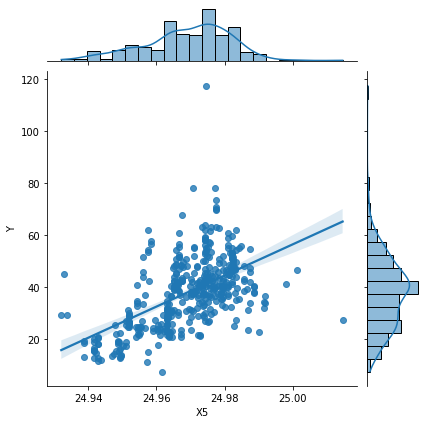

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X5', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan positif antara garis lintang (posisi letak geografis rumah) rumah dengan harga unit rumah.

### X6 vs Y

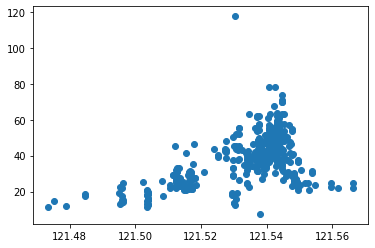

In [ ]:
#Longitude vs House Price
plt.scatter(df['X6'], df['Y'])

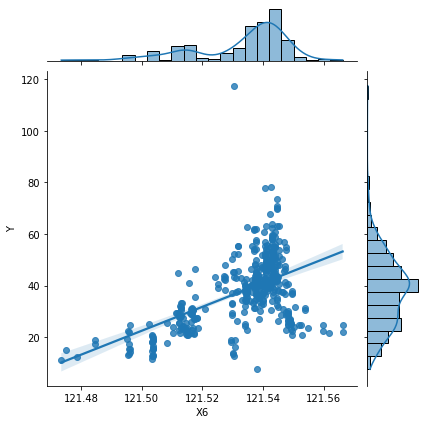

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X6', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan positif antara garis bujur (posisi letak geografis rumah) rumah dengan harga unit rumah.

Dapat disimpulkan bahwa variable yang berhubungan dengan harga unit rumah (Y) setelah drop outliers:
1. X3
2. X4
3. X5
4. X6

## Feature Engineering:

###  Checking Multicolinearity

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix antara variable X')

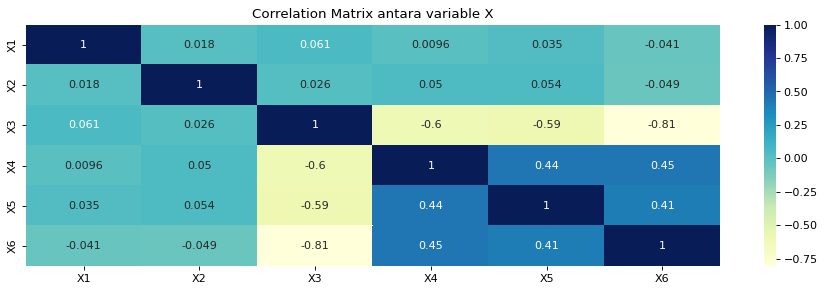

In [ ]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')

Key takeaway: Ada multicolinearity antara vaiable X3 dan X6. (X3 dan X6 memiliki korelasi yang signifikan (-0.81)).

**KEPUTUSAN**

dilihat dari besarnya nilai koef corr X3 dan X6 terhadap Y

*  Buang variabel untuk koef corr yang lebih kecil nilainya terhadap Y
*  karena koef corr X6 terhadap Y lebih kecil dibandingkan X3 terhadap Y

Jadi, variable yang akan dimasukkan ke dalam model yaitu X3 dan X4

# 3. Data Preprocessing

### Check null values

In [ ]:
df.isna().sum().sort_values(ascending=False)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

Key takeaway: Tidak ada null values

### Data Conversion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [ ]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4      int64
X5    float64
X6    float64
Y     float64
dtype: object

Key takeaway: Ada kesalahan tipe data, X1 harusnya tipe datetime

In [ ]:
df["X1"] = pd.to_datetime(df["X1"])

In [ ]:
df.dtypes

X1    datetime64[ns]
X2           float64
X3           float64
X4             int64
X5           float64
X6           float64
Y            float64
dtype: object

In [ ]:
df.X1

0     1970-01-01 00:00:00.000002012
1     1970-01-01 00:00:00.000002012
2     1970-01-01 00:00:00.000002013
3     1970-01-01 00:00:00.000002013
4     1970-01-01 00:00:00.000002012
                   ...             
409   1970-01-01 00:00:00.000002013
410   1970-01-01 00:00:00.000002012
411   1970-01-01 00:00:00.000002013
412   1970-01-01 00:00:00.000002013
413   1970-01-01 00:00:00.000002013
Name: X1, Length: 414, dtype: datetime64[ns]

### Checking duplicate values

In [ ]:
# Check duplicate values
df[df.duplicated(keep=False)]

,X1,X2,X3,X4,X5,X6,Y


Key takeaway: Tidak ada duplicate values

# Feature Engineering:

In [ ]:
df.X1.unique()

array(['1970-01-01T00:00:00.000002012', '1970-01-01T00:00:00.000002013'],
      dtype='datetime64[ns]')

In [ ]:
df['Year'] = pd.to_datetime(df['X1'], errors='coerce', utc=True).dt.strftime('%Y')

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,Y,Year
0,1970-01-01 00:00:00.000002012,32.0,84.87882,10,24.98298,121.54024,37.9,1970
1,1970-01-01 00:00:00.000002012,19.5,306.59470,9,24.98034,121.53951,42.2,1970
2,1970-01-01 00:00:00.000002013,13.3,561.98450,5,24.98746,121.54391,47.3,1970
3,1970-01-01 00:00:00.000002013,13.3,561.98450,5,24.98746,121.54391,54.8,1970
4,1970-01-01 00:00:00.000002012,5.0,390.56840,5,24.97937,121.54245,43.1,1970


# 4. Model Prediction

In [ ]:
X = df.loc[:, 'X3':'X5']

In [ ]:
y = pd.DataFrame(df['Y'])

In [ ]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937
...,...,...,...
409,4082.01500,0,24.94155
410,90.45606,9,24.97433
411,390.96960,7,24.97923
412,104.81010,5,24.96674


In [ ]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# check scalling
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[-0.19222706 -0.07030829  0.76166568]
 [-0.76884442  0.27192764 -0.21962418]
 [-0.78048349  1.64087134  0.39489645]
 [-0.53713543  0.27192764  0.80295758]
 [ 0.14884564 -1.09701606  0.60621382]
 [-0.76468035  1.98310727  1.00132063]
 [ 2.4435883  -1.43925199 -2.14415058]
 [ 0.90980693 -0.41254421 -0.51838322]
 [-0.61625119  0.61416356  0.64669607]
 [-0.75461243  1.29863542 -0.15323328]]


In [ ]:
print(y_train[:10])

        Y
159  37.4
95   51.8
11   58.1
374  49.5
165  30.6
363  48.0
41   18.2
401  27.7
379  69.7
389  67.7


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
ypred=model.predict(X_test)

In [ ]:
ypred = ypred.reshape(-1,1)

In [ ]:
# evaluate model
display(model.score(X_test, y_test))

0.5535292470183282

In [ ]:
from sklearn.metrics import r2_score  # koef determinasi, semakin besar semakin bagus
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### MSE

In [ ]:
print('MSE : ', mean_squared_error(y_test,ypred).round(2))
print('MAE : ', mean_absolute_error(y_test,ypred).round(2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)).round(2))

MSE :  67.77
MAE :  6.73
RMSE :  8.23


#### R-Square

In [ ]:
r2_lr = r2_score(y_test,ypred).round(2)
r2_lr

0.55

Model regresi ini hanya mampu menjelaskan 55% keragaman datanya. 
Model regresi cukup baik jika r2 > 75%. Sisanya 45% dapat dijelaskan oleh variable lain di luar model.

## Random Forest Regression

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

# evaluate model
display(model2.score(X_test, y_test))

# use model to predict
ypred = model2.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

<ipython-input-482-1944706cba00>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


0.5309007007809339

MSE :  71.20273115365498
MAE :  6.69206846550943
RMSE :  8.438171078714568


## Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'rbf')
model3.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
# evaluate model
display(model3.score(X_test, y_test))

# use model to predict
ypred = model3.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.6449346834238843

MSE :  53.89396300579469
MAE :  6.188865278115416
RMSE :  7.341250779383217


## Model Comparison

Model SVR > Regresi Linear > Random Forest (sebelum drop outliers)

# 5. Conclusion

Model yang terbaik adalah hasil model dari SVR karena memiliki akurasi model (r-square) 0.64 lebih tinggi dari model lainnya. (sebelum drop outliers)

In [ ]:
# buat prediksi
model3.predict([[85, 10, 25]])

array([33.72208094])

# ----Tambahan Drop Semua Outliers----

## Import Data

In [ ]:
df = pd.read_csv('/content/real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#drop column no
df.drop(columns='No', inplace=True)

In [ ]:
#Hapus comment pada label column supaya lebih simple
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

## Check Outliers

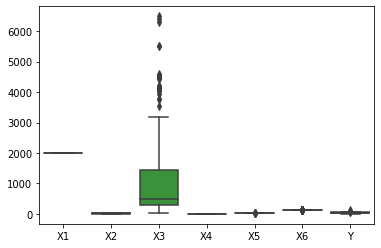

In [ ]:
sns.boxplot(data=df)

Key takeaway: Ada outliers pada fitur x3, x5, x6, dan Y

## Drop All Outliers

Drop semua outliers dari semua fitur

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 414
Jumlah baris setelah memfilter outlier: 371


Baris yang berkurang sebesar 43 baris atau 10.38%

## Check correlation

<ipython-input-491-7620f98261ec>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

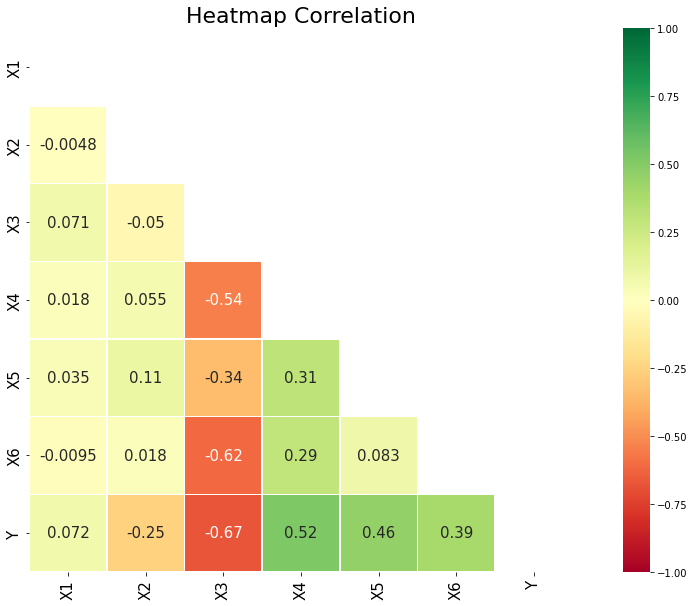

In [ ]:
#Heatmap Correlation
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway: Berdasarkan correlation test setelah drop semua outliers dapat diketahui bahwa ada hubungan variable antara variable X3 dan X4 dengan Y. 
(|koefisien correlasi| > 0.5)

X3 dan Y memiliki koef corr negatif(-0.67), artinya jarak MRT berhubungan negatif dengan besarnya harga unit rumah area perumahan dengan MRT semakin mahal harga rumahnya, dan sebaliknya. Semakin dekat stasiun MRT semakin mahal harga unit rumahnya.

## X3 vs Y

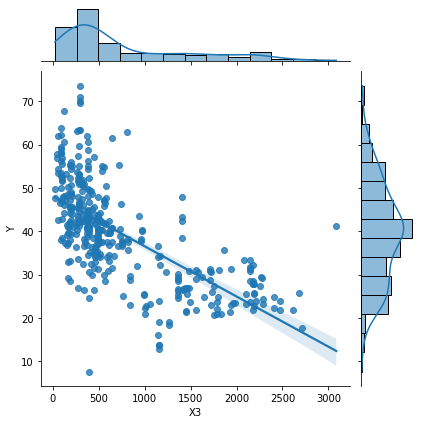

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X3', y='Y', data=df, kind="reg")

## X4 vs Y

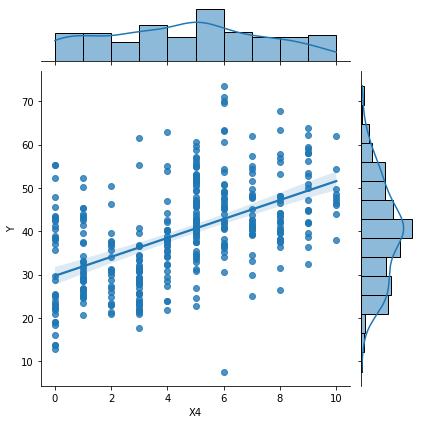

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X4', y='Y', data=df, kind="reg")

# 4. Model Prediction

In [ ]:
X = df.loc[:, 'X3':'X4']

In [ ]:
y = pd.DataFrame(df['Y'])

In [ ]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X

,X3,X4
0,84.87882,10
1,306.59470,9
2,561.98450,5
3,561.98450,5
4,390.56840,5
...,...,...
408,2175.74400,3
410,90.45606,9
411,390.96960,7
412,104.81010,5


In [ ]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
408,28.1
410,50.0
411,40.6
412,52.5


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# check scalling
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[-0.29209454 -0.14398683]
 [-0.39354004  1.30076242]
 [-0.89277574  0.93957511]
 [ 0.3753914  -1.58873609]
 [ 0.59517889 -1.58873609]
 [ 1.64311188 -0.86636146]
 [-0.44905909  0.21720048]
 [-0.538709    0.21720048]
 [ 0.12197718 -1.58873609]
 [ 0.89386369 -1.22754877]]


In [ ]:
print(y_train[:10])

        Y
28   47.0
325  38.1
82   48.1
248  22.3
375  23.8
336  35.6
145  45.5
210  52.2
259  28.8
152  28.9


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
ypred=model.predict(X_test)

In [ ]:
ypred = ypred.reshape(-1,1)

In [ ]:
# evaluate model
display(model.score(X_test, y_test))

0.4312777367681504

In [ ]:
from sklearn.metrics import r2_score  # koef determinasi, semakin besar semakin bagus
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### MSE

In [ ]:
print('MSE : ', mean_squared_error(y_test,ypred).round(2))
print('MAE : ', mean_absolute_error(y_test,ypred).round(2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)).round(2))

MSE :  82.61
MAE :  6.57
RMSE :  9.09


#### R-Square

In [ ]:
r2_lr = r2_score(y_test,ypred).round(2)
r2_lr

0.43

Model regresi ini hanya mampu menjelaskan 43% keragaman datanya. 
Model regresi cukup baik jika r2 > 75%. 

## Random Forest Regression

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

# evaluate model
display(model2.score(X_test, y_test))

# use model to predict
ypred = model2.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

<ipython-input-509-1944706cba00>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


0.4328831054435849

MSE :  82.3803034574649
MAE :  6.598663754881754
RMSE :  9.076359592780847


## Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'rbf')
model3.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
# evaluate model
display(model3.score(X_test, y_test))

# use model to predict
ypred = model3.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.4273326554481873

MSE :  83.18657066504647
MAE :  6.552312058946294
RMSE :  9.120667226965715


## Model Comparison

Random Forest > Regresi Linear > Model SVR    (setelah drop semua outliers)

# 5. Conclusion

Model yang terbaik adalah hasil model dari Random Forest karena memiliki akurasi model (r-square) 0.432 lebih tinggi dari model lainnya. (setelah drop semua outliers)

In [ ]:
# buat prediksi
model2.predict([[85, 10]])

array([31.15059648])

# ---- Drop Predictor Outliers ----

## Import Data

In [ ]:
df = pd.read_csv('/content/real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#drop column no
df.drop(columns='No', inplace=True)

In [ ]:
#Hapus comment pada label column supaya lebih simple
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

## Check Outliers

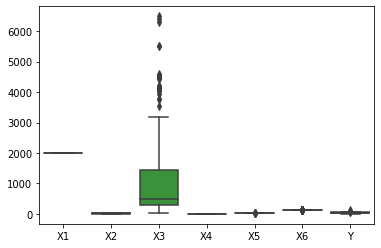

In [ ]:
sns.boxplot(data=df)

Key takeaway: Ada outliers pada fitur x3, x5, x6, dan Y

## Drop Predictors Outliers

Drop hanya predictor outliers dari fitur predictor

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in df.columns:
  # Except Target
  if col == 'Y':
    break
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (IQR * 1.5)
  high_limit = Q3 + (IQR * 1.5)

  filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 414
Jumlah baris setelah memfilter outlier: 374


Baris yang berkurang sebesar 40 baris atau 9.7%

## Check correlation

<ipython-input-518-7620f98261ec>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

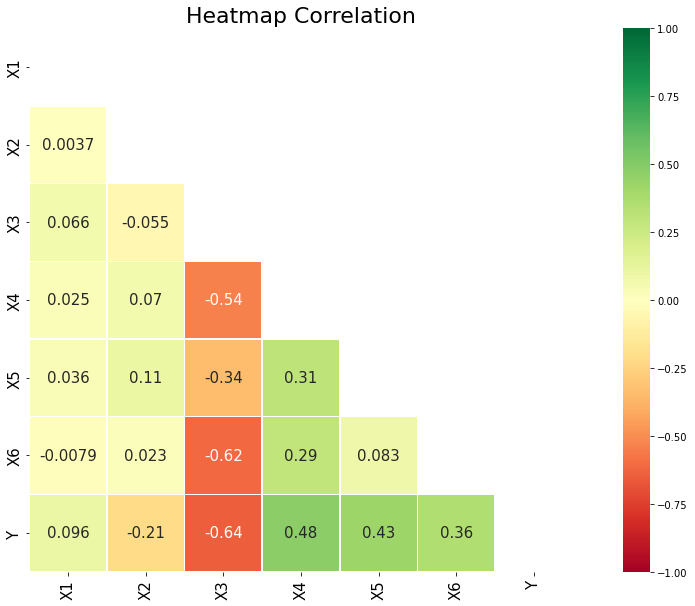

In [ ]:
#Heatmap Correlation
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway: Berdasarkan correlation test setelah drop predictors outliers dapat diketahui bahwa ada hubungan variable antara variable X3 dengan Y. 
(|koefisien correlasi| > 0.5)

X3 dan Y memiliki koef corr negatif(-0.64), artinya jarak MRT berhubungan negatif dengan besarnya harga unit rumah area perumahan dengan MRT semakin mahal harga rumahnya, dan sebaliknya. Semakin dekat stasiun MRT semakin mahal harga unit rumahnya.

# 4. Model Prediction

In [ ]:
X = df[['X3']]

In [ ]:
y = pd.DataFrame(df['Y'])

In [ ]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X

,X3
0,84.87882
1,306.59470
2,561.98450
3,561.98450
4,390.56840
...,...
408,2175.74400
410,90.45606
411,390.96960
412,104.81010


In [ ]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
408,28.1
410,50.0
411,40.6
412,52.5


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# check scalling
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[-0.67508485]
 [-0.52546954]
 [-0.27881463]
 [ 1.42824362]
 [-0.87959435]
 [-1.01918568]
 [-0.31125328]
 [-0.52269502]
 [ 0.96922291]
 [ 1.56572551]]


In [ ]:
print(y_train[:10])

        Y
380  53.3
210  52.2
28   47.0
324  31.3
82   48.1
291  54.4
130  37.5
104  30.5
221  38.5
212  31.1


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
ypred=model.predict(X_test)

In [ ]:
ypred = ypred.reshape(-1,1)

In [ ]:
# evaluate model
display(model.score(X_test, y_test))

0.40854873792862

In [ ]:
from sklearn.metrics import r2_score  # koef determinasi, semakin besar semakin bagus
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### MSE

In [ ]:
print('MSE : ', mean_squared_error(y_test,ypred).round(2))
print('MAE : ', mean_absolute_error(y_test,ypred).round(2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)).round(2))

MSE :  74.69
MAE :  6.02
RMSE :  8.64


#### R-Square

In [ ]:
r2_lr = r2_score(y_test,ypred).round(2)
r2_lr

0.41

Model regresi ini hanya mampu menjelaskan 41% keragaman datanya. 
Model regresi cukup baik jika r2 > 75%.

## Random Forest Regression

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

# evaluate model
display(model2.score(X_test, y_test))

# use model to predict
ypred = model2.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

<ipython-input-534-1944706cba00>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


0.4474195551104162

MSE :  69.77961298934781
MAE :  6.022401677724415
RMSE :  8.35341923941016


## Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'rbf')
model3.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
# evaluate model
display(model3.score(X_test, y_test))

# use model to predict
ypred = model3.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.460044619631947

MSE :  68.18532545270868
MAE :  5.726050249722264
RMSE :  8.257440611515694


## Model Comparison

Model SVR > Random Forest > Regresi Linear    (setelah drop predictors outliers)

# 5. Conclusion

Model yang terbaik adalah hasil model dari SVR karena memiliki akurasi model (r-square) 0.46 lebih tinggi dari model lainnya. (setelah drop predictors outliers)

In [ ]:
# buat prediksi
model3.predict([[85]])

array([34.56018968])

# ---- Drop Target Outliers ----

## Import Data

In [ ]:
df = pd.read_csv('/content/real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#drop column no
df.drop(columns='No', inplace=True)

In [ ]:
#Hapus comment pada label column supaya lebih simple
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

## Drop Target Outliers

Drop hanya target outliers dari fitur target

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in df.columns:
  # Except Predictors
  if col != 'Y':
    continue
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (IQR * 1.5)
  high_limit = Q3 + (IQR * 1.5)

  filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 414
Jumlah baris setelah memfilter outlier: 411


Baris yang berkurang sebesar 3 baris atau 0.72%

## Check correlation

<ipython-input-542-7620f98261ec>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

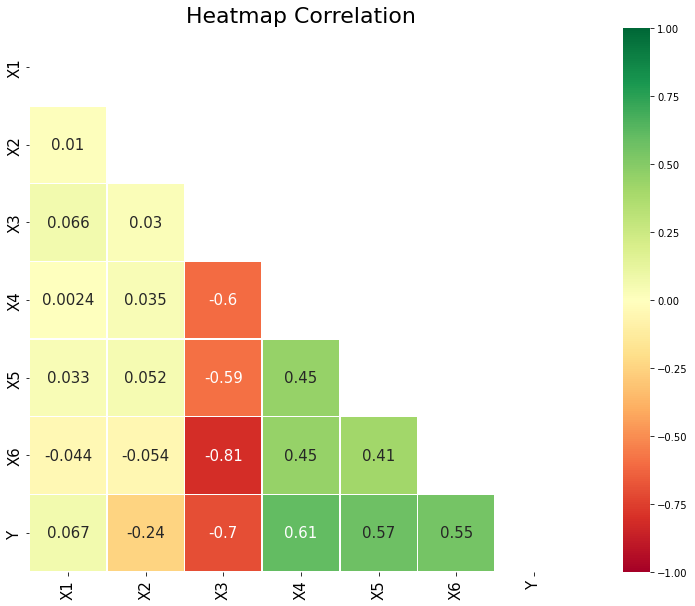

In [ ]:
#Heatmap Correlation
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway: Berdasarkan correlation test setelah drop target outliers dapat diketahui bahwa ada hubungan variable antara variable X3, x4, x5, dan x6 dengan Y. 
(|koefisien correlasi| > 0.5)

X3 dan Y memiliki koef corr negatif(-0.7), artinya jarak MRT berhubungan negatif dengan besarnya harga unit rumah area perumahan dengan MRT semakin mahal harga rumahnya, dan sebaliknya. Semakin dekat stasiun MRT semakin mahal harga unit rumahnya.

###  Checking Multicolinearity

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix antara variable X')

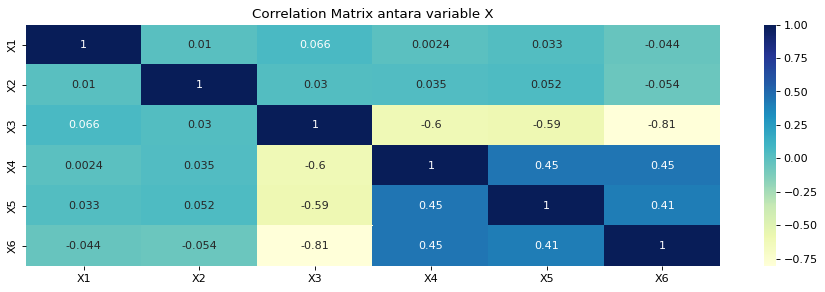

In [ ]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')

Key takeaway: Ada multicolinearity antara vaiable X3 dan X6. (X3 dan X6 memiliki korelasi yang signifikan (-0.81)).

**KEPUTUSAN**

dilihat dari besarnya nilai koef corr X3 dan X6 terhadap Y

*  Buang variabel untuk koef corr yang lebih kecil nilainya terhadap Y
*  karena koef corr X6 terhadap Y lebih kecil dibandingkan X3 terhadap Y

Jadi, variable yang akan dimasukkan ke dalam model yaitu X3 dan X4

# 4. Model Prediction

In [ ]:
X = df.loc[:, 'X3':'X5']

In [ ]:
y = pd.DataFrame(df['Y'])

In [ ]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937
...,...,...,...
409,4082.01500,0,24.94155
410,90.45606,9,24.97433
411,390.96960,7,24.97923
412,104.81010,5,24.96674


In [ ]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# check scalling
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[ 0.02626102 -0.02282438  1.81468406]
 [ 1.54898949 -1.38398722 -1.17834838]
 [ 2.32527848 -1.38398722 -2.11508055]
 [-0.74039706 -1.04369651  0.35924552]
 [-0.48686441  0.31746633 -0.32860424]
 [-0.21504679 -1.38398722 -0.47438973]
 [-0.23219168 -0.02282438  0.77566042]
 [-0.65448945  0.99804775  0.48731122]
 [-0.78762975  2.01891988  1.01407205]
 [ 1.06887607 -0.02282438 -0.65642023]]


In [ ]:
print(y_train[:10])

        Y
296  34.1
307  24.7
41   18.2
306  50.2
139  42.5
239  29.7
159  37.4
23   47.9
363  48.0
13   23.8


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
ypred=model.predict(X_test)

In [ ]:
ypred = ypred.reshape(-1,1)

In [ ]:
# evaluate model
display(model.score(X_test, y_test))

0.6191822804548149

In [ ]:
from sklearn.metrics import r2_score  # koef determinasi, semakin besar semakin bagus
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### MSE

In [ ]:
print('MSE : ', mean_squared_error(y_test,ypred).round(2))
print('MAE : ', mean_absolute_error(y_test,ypred).round(2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)).round(2))

MSE :  65.88
MAE :  6.3
RMSE :  8.12


#### R-Square

In [ ]:
r2_lr = r2_score(y_test,ypred).round(2)
r2_lr

0.62

Model regresi ini hanya mampu menjelaskan 41% keragaman datanya. 
Model regresi cukup baik jika r2 > 75%.

## Random Forest Regression

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

# evaluate model
display(model2.score(X_test, y_test))

# use model to predict
ypred = model2.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

<ipython-input-560-1944706cba00>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


0.7156824813272102

MSE :  49.183941042331575
MAE :  5.309229580582352
RMSE :  7.0131263386831675


## Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'rbf')
model3.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
# evaluate model
display(model3.score(X_test, y_test))

# use model to predict
ypred = model3.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.6339392861178776

MSE :  63.32465425815911
MAE :  5.9900984794024295
RMSE :  7.9576789491760165


## Model Comparison

Random Forest > Model SVR > Regresi Linear    (setelah drop target outliers)

# 5. Conclusion

Model yang terbaik adalah hasil model dari Random Forest karena memiliki akurasi model (r-square) 0.72 lebih tinggi dari model lainnya. (setelah drop target outliers)

In [ ]:
# buat prediksi
model2.predict([[85, 10, 25]])

array([26.91877443])

# **** KESIMPULAN AKHIR ****

- Sebelum drop outliers, Model SVR > Regresi Linear > Random Forest, model dari SVR memiliki akurasi model (r-square) 0.64

- Setelah drop semua outliers, Random Forest > Regresi Linear > Model SVR, Random Forest memiliki akurasi model (r-square) 0.432

- Setelah drop predictors outliers, Model SVR > Random Forest > Regresi Linear, model dari SVR memiliki akurasi model (r-square) 0.46

- Setelah drop target outliers, Random Forest > Model SVR > Regresi Linear, model dari Random Forest memiliki akurasi model (r-square) 0.72